Number of steps: 61
Final path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 6), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (8, 5), (9, 5), (10, 5), (10, 6), (10, 7), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (8, 11), (7, 11), (6, 11), (6, 10), (6, 9), (5, 9), (4, 9), (3, 9), (2, 9), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 15), (3, 15), (3, 14), (4, 14), (5, 14), (5, 15), (5, 16), (6, 16), (7, 16), (8, 16), (9, 16), (10, 16)]


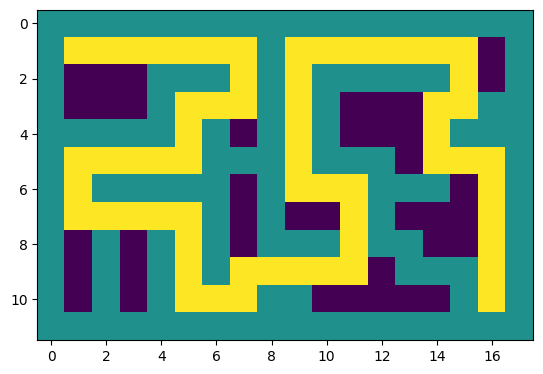

In [2]:
from collections import deque
import matplotlib.pyplot as plt
import heapq

start = (1, 1)
end = (10, 16)
path = []
maze = []
visited = []
coordinate_costs = {}



with open("/Users/davidroldanmachado/Desktop/ICC/8/ICC-CI/Ex/EjercicioDijikstra/maze_04.csv", "r") as file:
    for line in file:
        line = line.split(",")
        row = []
        for c in line:
            if "1" in c:
                row.append(1)
            else:
                row.append(0)
        maze.append(row)

def manhattan_calc(start, end):
    return abs(start[0] - end[0]) + abs(start[1] - end[1])


def reconstruct_path(start, current, predecessors):
    path = [] 

    while current != start:
        path.insert(0, current)  # Add current to the beginning of our path 
        current = predecessors[current] # upate the current node to predeccesors so in this way we do the path towards start node

    path.insert(0, start)  # Add start to the beginning of path
    return path



def Dijkstra_queue(start, goal, maze):
    queue = []  # This will be a queue of visited nodes
    heapq.heappush(queue, (0, start))  # Push the start node with priority 0
    predecessors = {start: None}
    costs = {start: 0}

    while queue:
        current_cost, current_node = heapq.heappop(queue) # get the node with the lowest cost fromo our queue
    
        if current_node == goal: #if get to our goal we restruct the path for our final result
            return reconstruct_path(start, goal, predecessors)
        # 
        for direction in [(-1, 0), (0, 1), (1, 0), (0, -1)]: 
            next_node = (current_node[0] + direction[0], current_node[1] + direction[1])
            if 0 <= next_node[0] < len(maze) and 0 <= next_node[1] < len(maze[0]) and maze[next_node[0]][next_node[1]] == 0:
                
                new_cost = current_cost + 1   # Just add 1 for the distance
                if next_node not in costs or new_cost < costs[next_node]:
                    costs[next_node] = new_cost 
                    priority = new_cost
                    heapq.heappush(queue, (priority, next_node))
                    predecessors[next_node] = current_node
                    #maze[next_node[0]][next_node[1]] = 2


    return None  # If goal is not reachable

#my codes is visiting all the path instead of just visting the final path

def main():
    result = Dijkstra_queue(start, end, maze)

    if result is not None:
        final_path = result
        print("Number of steps:", len(final_path))
        print("Final path:", final_path)
        for (x, y) in final_path:
            maze[x][y] = 2  # Mark the final path
        plt.imshow(maze, cmap='viridis', origin='upper')
        plt.show()
       

    else:
        print("No path found.")


if __name__ == "__main__":
    main()
